In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

In [23]:
# Load the CSV file
zoo_data = pd.read_csv("zoo (9).csv")

In [25]:
# Optional: Drop non-numerical columns (like animal name or ID)
if 'animal_name' in zoo_data.columns:
    zoo_data = zoo_data.drop(columns=['animal_name'])

In [27]:
# Separate features
X = zoo_data.select_dtypes(include='number')

In [29]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Corrected line without 'affinity'
cluster = AgglomerativeClustering(n_clusters=7, linkage='ward')
labels = cluster.fit_predict(X_scaled)

In [33]:
cluster = AgglomerativeClustering(n_clusters=7, linkage='ward')
labels = cluster.fit_predict(X_scaled)

In [35]:
zoo_data['Cluster'] = labels
print(zoo_data['Cluster'].value_counts())


Cluster
3    29
2    21
0    17
4    12
1    10
5     8
6     4
Name: count, dtype: int64


In [40]:
# Example assuming original labels are in 'class_type'
actual_labels = zoo_data['class_type']
predicted_labels = zoo_data['Cluster']

In [42]:
# Check if they are exactly equal (rare for unsupervised learning)
print("Are actual and predicted labels equal?", (actual_labels == predicted_labels).all())

Are actual and predicted labels equal? False


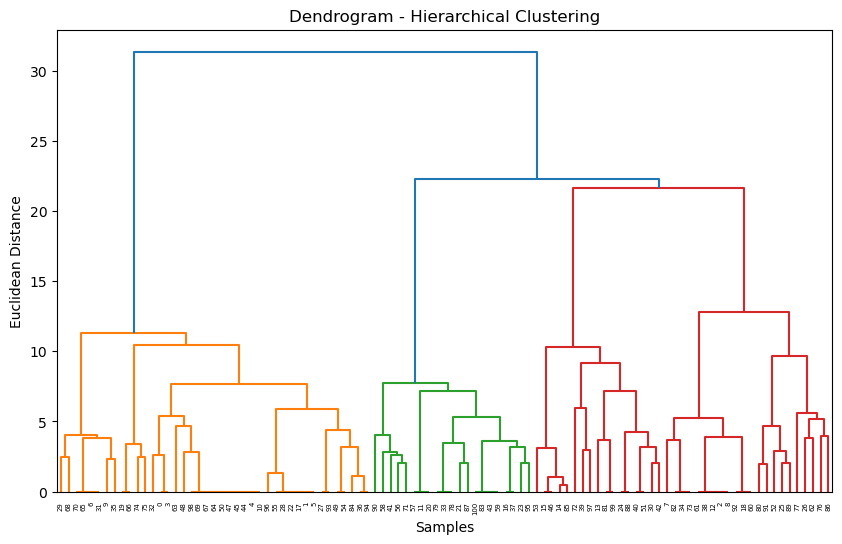

In [44]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()